# AlexNet

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [2]:
#計算準確度
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    
    print("After")
    poo=tf.shape(v_xs)
    poosee=tf.Session()
    print(poosee.run(poo))
    print("After")
    print("After")
    poo=tf.shape(y_pre)
    poosee=tf.Session()
    print(poosee.run(poo))
    print("After")
    print("After")
    poo=tf.shape(v_ys)
    poosee=tf.Session()
    print(poosee.run(poo))
    print("After")
    
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

#
# v_xs: input
# v_ys: output
# keep_prob是保留概率，即我们要保留的结果所占比例
# 使输入tensor中某些元素變為0，其它没變0的元素變為原来的1/keep_prob大小！

In [3]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)  #截斷常態分佈
    return tf.Variable(initial)
# stddev:標準差

In [4]:
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [5]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [6]:
def conv2d_layer1(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 4, 4, 1], padding='SAME')

# x:input
# W:weight
# padding: same、valid
# stride [1, x_movement, y_movement, 1]      Must have strides[0] = strides[3] = 1

In [7]:
def max_pool_overlap(x):
    return tf.nn.max_pool(x, ksize=[1,3,3,1], strides=[1,2,2,1], padding='SAME')
# stride [1, x_movement, y_movement, 1]

# LRN

In [8]:
def norm(x):
    return tf.nn.lrn(x, depth_radius=2, bias=2.0, alpha=1e-4, beta=0.75)

## $
b^i_{x,y} = a^i_{x,y}\ \ / \ \ {( k + \alpha \sum_{j=max(0,i-n/2)}^{min(N-1,i+n/2)} \ ({a^j_{x,y}})^2}\ )^\beta \ 
$ 



In [9]:
# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 784])/256   # 28x28
ys = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, 28, 28, 1])    #[n_samples個數,圖長,圖寬,圖高]
print(x_image.shape)  # [n_samples, 28,28,1]

(?, 28, 28, 1)


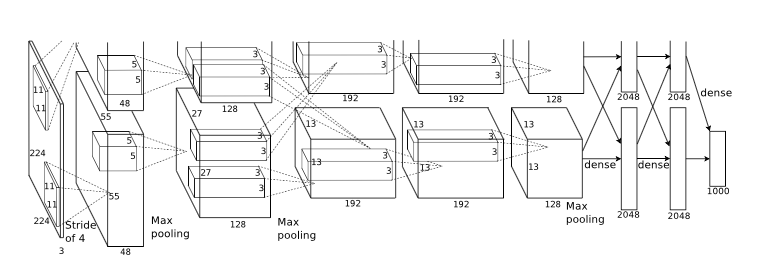

In [10]:
## conv1 layer ##
W_conv1 = weight_variable([11,11,1,96])
b_conv1 = bias_variable([96])
r_conv1 = tf.nn.relu(conv2d_layer1(x_image, W_conv1) + b_conv1)
n_conv1 = norm(r_conv1)
n_pool1 = max_pool_overlap(n_conv1)

In [11]:
## split layer 1 to 2 tensor ##
split_n_pool1_up, split_n_pool1_down = tf.split(n_pool1, [48,48], 3)

In [12]:
## conv2 layer up ##
W_conv2_up = weight_variable([5,5,48,128])
b_conv2_up = bias_variable([128])
r_conv2_up = tf.nn.relu(conv2d(split_n_pool1_up, W_conv2_up) + b_conv2_up)
n_conv2_up = norm(r_conv2_up)
n_pool2_up = max_pool_overlap(n_conv2_up)

In [13]:
## conv2 layer down ##
W_conv2_down = weight_variable([5,5,48,128])
b_conv2_down = bias_variable([128])
r_conv2_down = tf.nn.relu(conv2d(split_n_pool1_down, W_conv2_down) + b_conv2_down)
n_conv2_down = norm(r_conv2_down)
n_pool2_down = max_pool_overlap(n_conv2_down)

In [14]:
## merge layer 2 to 1 tensor ##
merge_layer2 = tf.concat([n_pool2_up, n_pool2_down], 3)

In [15]:
## conv3 layer ##
W_conv3 = weight_variable([3,3,256,384])
b_conv3 = bias_variable([384])
r_conv3 = tf.nn.relu(conv2d(merge_layer2, W_conv3) + b_conv3)

In [16]:
## split layer 3 to 2 tensor ##
split_n_pool3_up, split_n_pool3_down = tf.split(r_conv3, [192,192], 3)

In [17]:
## conv4 layer up ##
W_conv4_up = weight_variable([3,3,192,192])
b_conv4_up = bias_variable([192])
r_conv4_up = tf.nn.relu(conv2d(split_n_pool3_up, W_conv4_up) + b_conv4_up)

In [18]:
## conv4 layer down ##
W_conv4_down = weight_variable([3,3,192,192])
b_conv4_down = bias_variable([192])
r_conv4_down = tf.nn.relu(conv2d(split_n_pool3_down, W_conv4_down) + b_conv4_down)

In [19]:
## conv5 layer up ##
W_conv5_up = weight_variable([3,3,192,128])
b_conv5_up = bias_variable([128])
r_conv5_up = tf.nn.relu(conv2d(r_conv4_up, W_conv5_up) + b_conv5_up)
n_pool5_up = max_pool_overlap(r_conv5_up)

In [20]:
## conv5 layer down ##
W_conv5_down = weight_variable([3,3,192,128])
b_conv5_down = bias_variable([128])
r_conv5_down = tf.nn.relu(conv2d(r_conv4_down, W_conv5_down) + b_conv5_down)
n_pool5_down = max_pool_overlap(r_conv5_down)

In [21]:
##test
#reshape_pool5_up = tf.reshape(n_pool5_up, [-1, 12800])
#reshape_pool5_down = tf.reshape(n_pool5_down, [-1, 12800])
#layer5_flat = tf.concat([reshape_pool5_up, reshape_pool5_down], 1)

In [22]:
## merge layer 5 to 1 tensor ##
merge_layer5 = tf.concat([n_pool5_up, n_pool5_down], 3)

In [23]:
# [n_samples, 7, 7, 64] ->> [n_samples, 7*7*64]
layer5_flat = tf.reshape(merge_layer5, [-1, 25600])

In [24]:
## fc1 layer ##
W_fc1 = weight_variable([25600, 4096])
b_fc1 = bias_variable([4096])

h_fc1 = tf.nn.relu(tf.matmul(layer5_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [25]:
## fc2 layer ##
W_fc2 = weight_variable([4096, 4096])
b_fc2 = bias_variable([4096])

h_fc2 = tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)

In [26]:
## fc3 layer ##

#now using mnist label = 10
W_fc3 = weight_variable([4096, 10])
b_fc3 = bias_variable([10])

prediction = tf.nn.softmax(tf.matmul(h_fc2_drop, W_fc3) + b_fc3)

In [27]:
# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss
train_step = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)

In [28]:
##test
correct_prediction = tf.equal(tf.argmax(prediction,1), tf.argmax(ys,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
##end

In [ ]:
sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

In [ ]:
##test
for i in range(1000):
    batch = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch[0], ys: batch[1], keep_prob: 0.5})  # 训练阶段使用75%的Dropout
   
    if i % 50 == 0:
        train_accuracy = sess.run(accuracy, feed_dict={xs:batch[0], ys: batch[1], keep_prob: 1.0}) #评估阶段不使用Dropout
        print("step %d, training accuracy %g" % (i, train_accuracy))
    if i % 100 == 0:
        print("test accuracy %g" % sess.run(accuracy, feed_dict={xs: mnist.test.images[:100], ys: mnist.test.labels[:100], keep_prob: 1.0})) #评估阶段不使用Dropout
        

step 0, training accuracy 0.1
test accuracy 0.08
step 50, training accuracy 0.04
step 100, training accuracy 0.09
test accuracy 0.08
step 150, training accuracy 0.06
step 200, training accuracy 0.08
test accuracy 0.08
step 250, training accuracy 0.06
step 300, training accuracy 0.1
test accuracy 0.08
step 350, training accuracy 0.11
step 400, training accuracy 0.1
test accuracy 0.08
